In [304]:
# Use the data of wdbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./wdbc.csv',header=None)

In [305]:
# Checking the shape of the dataset
print(df.shape)

(569, 32)


In [306]:
# Removing the column with ID Number since it's irrelevant to our classifier
df.drop(df.columns[0], axis=1, inplace=True)

In [307]:
# Confirming removal of ID Number
print(df.shape)

(569, 31)


In [308]:
from sklearn.preprocessing import StandardScaler

# Normalization required
# normals = [2,3,4,5,15,23,24,25]

# for x in normals:
#     df[x] = Normalizer().fit_transform(df[x])


In [309]:
# Spliiting the output variable
y = df.iloc[:,0]
df.drop(df.columns[0], axis=1, inplace=True)

df = StandardScaler().fit_transform(df)

print(df)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [310]:
# Encoding the output variable
from sklearn.preprocessing import LabelEncoder

# print(y.head)
le = LabelEncoder()
y = le.fit_transform(y)

In [311]:
# Splitting the model in 70-30 scheme for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=2, stratify=y)

Number of mislabeled points out of a total 171 points : 14
Confusion matrix


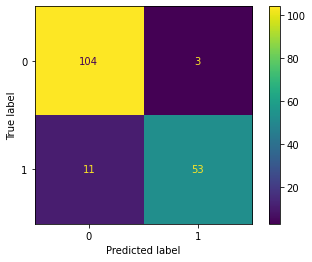

In [312]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(cm).plot()


Accuracy : 0.9181286549707602
F1 score : 0.9181286549707602


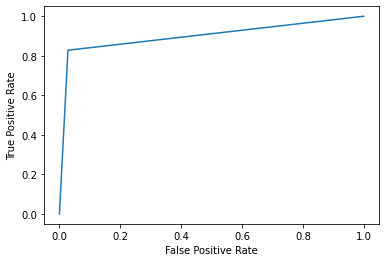

In [313]:
# Final metrics 

from sklearn.metrics import f1_score, accuracy_score, roc_curve, RocCurveDisplay

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 score :", f1_score(y_test, y_pred, average='micro'))

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()